<a href="https://colab.research.google.com/github/orwel1984/yolov3KerasJupyter/blob/master/Yolo_v3_Object_Detection_using_Keras_%5BCOLAB%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/orwel1984/yolov3KerasJupyter.git

Cloning into 'yolov3KerasJupyter'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 38 (delta 11), reused 28 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (38/38), 5.87 MiB | 12.57 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [2]:
!ls -la

total 20
drwxr-xr-x 1 root root 4096 Nov 18 15:06 .
drwxr-xr-x 1 root root 4096 Nov 18 14:56 ..
drwxr-xr-x 4 root root 4096 Nov 12 14:30 .config
drwxr-xr-x 1 root root 4096 Nov 12 14:30 sample_data
drwxr-xr-x 4 root root 4096 Nov 18 15:06 yolov3KerasJupyter


In [3]:
cd yolov3KerasJupyter/

/content/yolov3KerasJupyter


In [4]:
!nvidia-smi

Tue Nov 18 15:06:46 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   33C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
!apt-get update && apt-get install -y \
  ffmpeg \
  wget

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://cli.github.com/packages stable InRelease [3,917 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://cli.github.com/packages stable/main amd64 Packages [343 B]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,149 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,465 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [3,532 kB]
Hit:12 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:13 https://ppa.launchpadcontent.net/graphics-drivers/pp

In [7]:
!pip install --no-cache-dir --upgrade pip && \
    pip install --no-cache-dir -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 47.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [8]:
!pwd

/content/yolov3KerasJupyter


In [9]:
!ls -la

total 2548
drwxr-xr-x 4 root root    4096 Nov 18 15:06  .
drwxr-xr-x 1 root root    4096 Nov 18 15:06  ..
-rw-r--r-- 1 root root     324 Nov 18 15:06  Dockerfile
drwxr-xr-x 8 root root    4096 Nov 18 15:06  .git
drwxr-xr-x 2 root root    4096 Nov 18 15:06  images
-rw-r--r-- 1 root root     122 Nov 18 15:06  __init__.py
-rw-r--r-- 1 root root    8997 Nov 18 15:06  Model.py
-rw-r--r-- 1 root root     733 Nov 18 15:06  README.md
-rw-r--r-- 1 root root      14 Nov 18 15:06  requirements.txt
-rw-r--r-- 1 root root    3719 Nov 18 15:06  Utils.py
-rw-r--r-- 1 root root    2400 Nov 18 15:06  WeightsReader.py
-rw-r--r-- 1 root root 1289475 Nov 18 15:06 'Yolo_v3_Object_Detection_using_Keras_[COLAB].ipynb'
-rw-r--r-- 1 root root 1265194 Nov 18 15:06 'Yolo-v3 Object Detection using Keras.ipynb'


In [51]:
# IoU Threshold
iou_thresh = 0.98

# Objectness Threshold
obj_thresh = 0.98

In [41]:
net_h, net_w = 416, 416

# 3 anchor boxes (width,height) pairs
anchors = [ [[116, 90], [156, 198], [373, 326]],
             [[30, 61], [62, 45], [59, 119]],
             [[10, 13], [16, 30], [33, 23]]]


NUM_CLASS = 80

In [33]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2025-11-18 15:13:59--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 104.21.88.156, 172.67.185.199, 2606:4700:3037::6815:589c, ...
Connecting to pjreddie.com (pjreddie.com)|104.21.88.156|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://data.pjreddie.com/files/yolov3.weights [following]
--2025-11-18 15:13:59--  https://data.pjreddie.com/files/yolov3.weights
Resolving data.pjreddie.com (data.pjreddie.com)... 104.21.88.156, 172.67.185.199, 2606:4700:3037::6815:589c, ...
Connecting to data.pjreddie.com (data.pjreddie.com)|104.21.88.156|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M   143MB/s    in 1.6s    

2025-11-18 15:14:01 (143 MB/s) - ‘yolov3.weights.1’ saved [248007048/248007048]



In [42]:
from Model import YOLOv3
from tensorflow.keras.layers import Input
from WeightsReader import WeightReader

# create Yolo model
model = YOLOv3(Input(shape=(None, None, 3)), NUM_CLASS);
#model.summary()

# load the weights trained on COCO into the model
WeightReader("./yolov3.weights").load_weights(model)

In [43]:
import cv2
from Utils import preprocess_image

#image_path   =  "./images/maradona_1.jpg"
image_path   =  "./images/skateboard.jpg"


# load image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_h, image_w, _ = image.shape

# normalize the image data and convert to 4D tensor
input = preprocess_image(image, net_h, net_w)

In [45]:
output = model.predict(input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [47]:
from Model import extract_features
import numpy as np

boxes = np.empty([1, 4])
scores = np.empty([1, ])
classes = np.empty([1, 80])

for i in range(len(output)):
    _, S = output[i].shape[:2]

    b, s, c = extract_features( output[i], anchors[i], S, N=3, num_classes=(80), net_wh=(416,416))

    boxes = np.concatenate((boxes, b), axis=0)
    scores = np.concatenate((scores, s), axis=0)
    classes = np.concatenate((classes, c), axis=0)

In [52]:
import tensorflow as tf

selected_indices, selected_scores = tf.image.non_max_suppression_with_scores(
                                        boxes, scores, len(boxes),
                                        iou_threshold=iou_thresh,
                                        score_threshold=obj_thresh ,
                                        soft_nms_sigma=0.6)

selected_boxes = tf.gather(boxes, selected_indices)
selected_classes = tf.gather(classes, selected_indices)

In [53]:
from Utils import draw_boxes

draw_boxes(image, selected_boxes,selected_classes, selected_scores, image_w, image_h, net_w, net_h)
cv2.imwrite(image_path[:-4] + '_detected' + image_path[-4:], (image).astype('uint8'))

True

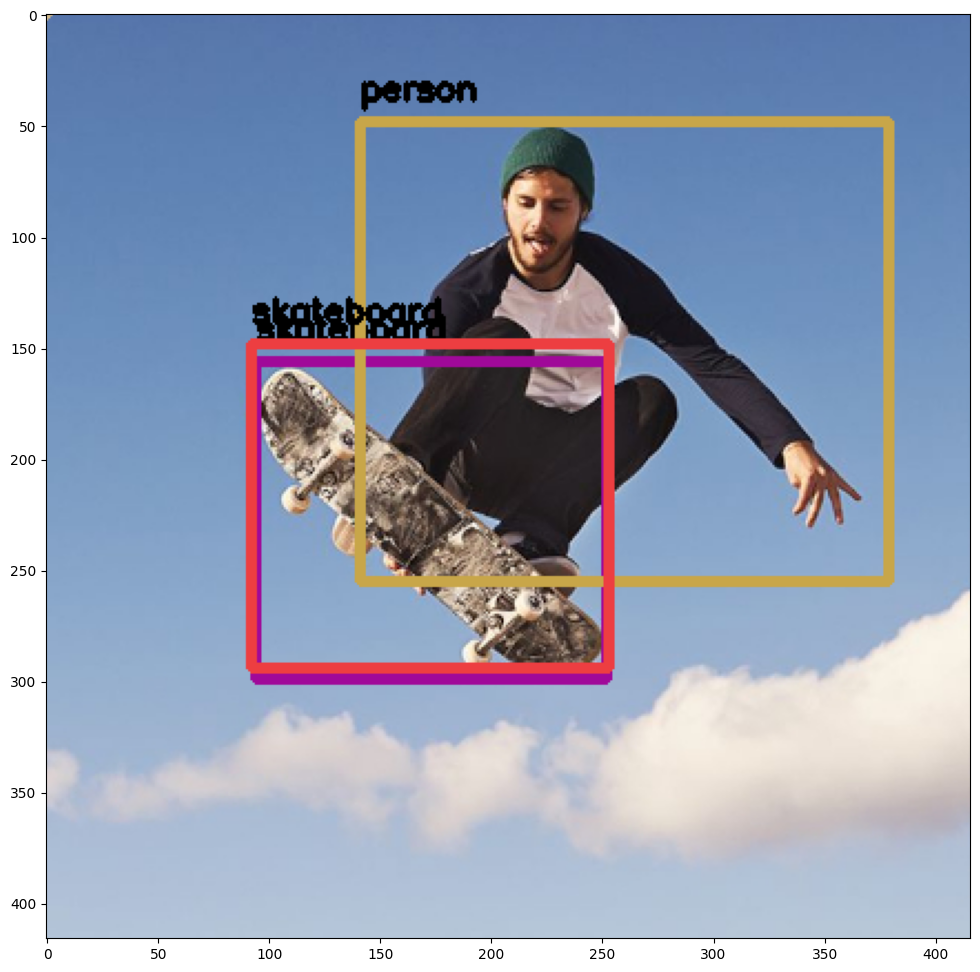

In [54]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 12))
axis = fig.add_subplot()
plt.imshow(image)
plt.show()